In [1]:
pip install shap

In [3]:
import pandas as pd

# Load the uploaded dataset
file_path = "ICI_groups1and2.csv"
df = pd.read_csv(file_path)

# Display the first few rows of the dataset
df.head()


,Unnamed: 0,Unnamed: 1,Round 1:,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 115,Unnamed: 116,Unnamed: 117,Unnamed: 118,Unnamed: 119,Unnamed: 120,Unnamed: 121,Unnamed: 122,Unnamed: 123,Unnamed: 124
0,NaN,NaN,NaN,T_CRmax,T_CLmax,T̅_CR,T̅_CL,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,SubjectID,NaN,T_offset1,Max1R13_1,Max1L13_1,aveAllR13_1,aveAllL13_1,T_RC1,T_RC_Dry1,T_RC_Wet1,...,aveOralM,Gender,Age,Ethnicity,T_atm,Humidity,Distance,Cosmetics,Time,Date
2,161117-1,NaN,-0.27,34.94,35.48,34.05,34.74,34.92,34.92,34.71,...,36.59,Male,41-50,White,24,28,0.8,NaN,12:43:46,16-11-17
3,161117-2,NaN,-0.21,33.56,34.93,33.23,34.14,34.80,33.97,34.80,...,37.19,Female,31-40,Black or African-American,24,26,0.8,NaN,15:22:48,16-11-17
4,161117-3,NaN,-0.28,35.91,35.60,35.46,34.71,35.83,35.83,35.50,...,37.34,Female,21-30,White,24,26,0.8,NaN,15:52:56,16-11-17


In [5]:
# Use row 1 as header and reload the data
df = pd.read_csv(file_path, header=1)

# Drop the first two rows (index 0 and 1 in original, now 0 after header shift) if they are still non-data rows
df = df[1:].reset_index(drop=True)

# Drop columns with all NaN or unnamed columns that aren't useful
df = df.dropna(axis=1, how='all')
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

# Display basic info and first few cleaned rows
df.info(), df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 56 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   T_CRmax    956 non-null    object
 1   T_CLmax    956 non-null    object
 2   T̅_CR      956 non-null    object
 3   T̅_CL      956 non-null    object
 4   T_CEmax    955 non-null    object
 5   T_FC       955 non-null    object
 6   T_FR       955 non-null    object
 7   T_FL       955 non-null    object
 8   T_FB       955 non-null    object
 9   T_FT       955 non-null    object
 10  T_FEmax    955 non-null    object
 11  T_FCmax    955 non-null    object
 12  T_max      955 non-null    object
 13  T_Mmax     955 non-null    object
 14  T_CRmax.1  879 non-null    object
 15  T_CLmax.1  879 non-null    object
 16  T̅_CR.1    879 non-null    object
 17  T̅_CL.1    879 non-null    object
 18  T_CEmax.1  878 non-null    object
 19  T_FC.1     879 non-null    object
 20  T_FR.1     879 non-null    obj

(None,
   T_CRmax T_CLmax  T̅_CR  T̅_CL T_CEmax   T_FC   T_FR   T_FL   T_FB   T_FT  \
 0   34.94   35.48  34.05  34.74   35.48  33.06  32.86  32.81  32.97  32.23   
 1   33.56   34.93  33.23  34.14   34.96  33.52  33.01  32.85  33.56  33.34   
 2   35.91   35.60  35.46  34.71   35.91  34.70  34.80  34.37  34.72  34.70   
 3   35.25   35.46  33.78  33.88   35.64  34.10  34.36  34.64  33.67  34.55   
 4   35.57   35.78  34.38  35.27   35.78  34.70  34.86  33.98  34.45  34.85   
 
    ... T_CEmax.3 T_FC.3 T_FR.3 T_FL.3 T_FB.3 T_FT.3 T_FEmax.3 T_FCmax.3  \
 0  ...     35.51  33.31  33.18  32.97  33.22  32.65     34.10     33.73   
 1  ...     34.79  33.65  33.86  33.44  33.67  33.52     34.36     34.17   
 2  ...     35.92  34.69  34.60  34.57  34.59  34.85     35.21     35.16   
 3  ...     35.88  33.75  33.97  34.21  33.97  34.07     35.27     34.34   
 4  ...     35.85  35.01  35.09  34.61  34.46  35.13     35.45     35.45   
 
   T_max.3 T_Mmax.3  
 0   36.39    36.39  
 1   36.30    3

In [7]:
print(df.columns.tolist())

['T_CRmax', 'T_CLmax', 'T̅_CR', 'T̅_CL', 'T_CEmax', 'T_FC', 'T_FR', 'T_FL', 'T_FB', 'T_FT', 'T_FEmax', 'T_FCmax', 'T_max', 'T_Mmax', 'T_CRmax.1', 'T_CLmax.1', 'T̅_CR.1', 'T̅_CL.1', 'T_CEmax.1', 'T_FC.1', 'T_FR.1', 'T_FL.1', 'T_FB.1', 'T_FT.1', 'T_FEmax.1', 'T_FCmax.1', 'T_max.1', 'T_Mmax.1', 'T_CRmax.2', 'T_CLmax.2', 'T̅_CR.2', 'T̅_CL.2', 'T_CEmax.2', 'T_FC.2', 'T_FR.2', 'T_FL.2', 'T_FB.2', 'T_FT.2', 'T_FEmax.2', 'T_FCmax.2', 'T_max.2', 'T_Mmax.2', 'T_CRmax.3', 'T_CLmax.3', 'T̅_CR.3', 'T̅_CL.3', 'T_CEmax.3', 'T_FC.3', 'T_FR.3', 'T_FL.3', 'T_FB.3', 'T_FT.3', 'T_FEmax.3', 'T_FCmax.3', 'T_max.3', 'T_Mmax.3']


In [9]:
columns = []
seen = {}
for col in df.columns:
    if pd.isna(col) or col == 'nan':
        col = f"unnamed_{len(seen)}"
    if col in seen:
        seen[col] += 1
        columns.append(f"{col}_{seen[col]}")
    else:
        seen[col] = 0
        columns.append(col)
df.columns = columns

In [11]:
categorical_cols = ['SubjectID', 'Gender', 'Ethnicity', 'Cosmetics', 'Time', 'Date']
numeric_columns = [col for col in df.columns if col not in categorical_cols]
df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')

In [13]:
print("Dataset Info:")
print(df.info())
print("\nFirst few rows:")
print(df.head())
print("\nMissing values:")
print(df.isnull().sum())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 56 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   T_CRmax    956 non-null    float64
 1   T_CLmax    956 non-null    float64
 2   T̅_CR      956 non-null    float64
 3   T̅_CL      956 non-null    float64
 4   T_CEmax    955 non-null    float64
 5   T_FC       955 non-null    float64
 6   T_FR       955 non-null    float64
 7   T_FL       955 non-null    float64
 8   T_FB       955 non-null    float64
 9   T_FT       955 non-null    float64
 10  T_FEmax    955 non-null    float64
 11  T_FCmax    955 non-null    float64
 12  T_max      955 non-null    float64
 13  T_Mmax     955 non-null    float64
 14  T_CRmax.1  879 non-null    float64
 15  T_CLmax.1  879 non-null    float64
 16  T̅_CR.1    879 non-null    float64
 17  T̅_CL.1    879 non-null    float64
 18  T_CEmax.1  878 non-null    float64
 19  T_FC.1     879 non-null    float64

In [15]:
target = 'aveOralF'
# Update feature selection based on actual column names
features = [col for col in df.columns if col not in ['aveOralF', 'aveOralM', 'SubjectID', 'Time', 'Date']]

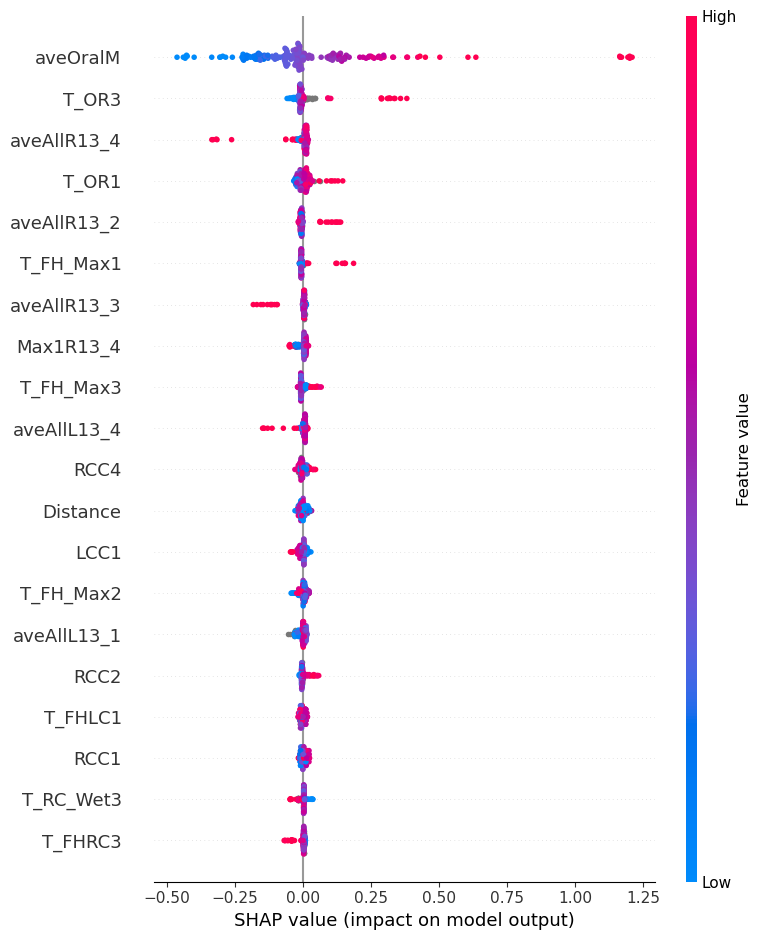

In [17]:
import shap
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.model_selection import train_test_split

# Load the dataset
df = pd.read_csv("ICI_groups1and2.csv", skiprows=1)

# Rename columns based on the first row (previously treated as data)
df.columns = df.iloc[0]
df = df[1:].reset_index(drop=True)

# Convert all numerical columns to float where possible
df = df.apply(pd.to_numeric, errors='coerce')

# Drop any columns that are completely NaN after conversion
df = df.dropna(axis=1, how='all')

# Define target variable and features
target = 'aveOralF'  # Assuming this as the regression target
features = [col for col in df.columns if col != target]

# Drop rows with missing target values
df = df.dropna(subset=[target])

# Split features and target
X = df[features]
y = df[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a regression model
model = HistGradientBoostingRegressor(max_iter=500, learning_rate=0.1, max_depth=6, random_state=42)
model.fit(X_train, y_train)

# Compute SHAP values
explainer = shap.Explainer(model, X_train)
shap_values = explainer(X_test)

# Generate SHAP summary plot
shap.summary_plot(shap_values, X_test)

In [19]:
pd.DataFrame(np.round(shap_values.values,3)).head(3)

,0,1,2,3,4,5,6,7,8,9,...,103,104,105,106,107,108,109,110,111,112
0,0.002,-0.001,-0.003,-0.001,-0.001,0.000,-0.000,0.004,0.001,-0.001,...,0.009,-0.001,-0.003,-0.001,-0.001,0.287,0.002,-0.006,0.006,-0.009
1,-0.005,-0.004,-0.005,-0.001,0.002,-0.004,0.003,0.002,0.001,-0.001,...,0.003,-0.011,0.006,-0.001,-0.004,-0.064,-0.000,-0.003,-0.001,0.004
2,-0.003,-0.001,0.003,0.002,-0.031,-0.001,0.009,-0.000,0.000,-0.001,...,0.001,0.007,0.005,0.024,0.025,1.165,0.001,-0.009,-0.002,0.001


In [21]:
pd.DataFrame(np.round(shap_values.base_values,3)).head(3)

,0
0,36.949
1,36.949
2,36.949


In [23]:
pd.DataFrame(np.round(shap_values.data,3)).head(3)

,0,1,2,3,4,5,6,7,8,9,...,103,104,105,106,107,108,109,110,111,112
0,-0.22,35.55,35.83,34.89,35.37,35.98,35.47,35.98,36.01,35.96,...,35.81,35.50,36.01,35.86,35.91,37.54,24.1,21.8,0.6,1.0
1,-0.31,36.18,35.86,35.79,35.30,36.16,36.14,36.11,36.18,36.02,...,35.65,35.63,37.40,37.29,37.40,36.89,24.0,20.5,0.6,0.0
2,0.01,36.92,37.61,36.61,37.26,36.91,36.91,36.88,36.92,37.62,...,36.92,36.59,38.29,38.25,38.29,38.69,24.1,41.3,0.6,0.0


In [25]:
columns = []
seen = {}
for col in df.columns:
    if pd.isna(col) or col == 'nan':
        col = f"unnamed_{len(seen)}"
    if col in seen:
        seen[col] += 1
        columns.append(f"{col}_{seen[col]}")
    else:
        seen[col] = 0
        columns.append(col)
df.columns = columns


In [27]:
categorical_cols = ['SubjectID', 'Gender', 'Ethnicity', 'Cosmetics', 'Time', 'Date']
numeric_columns = [col for col in df.columns if col not in categorical_cols]
df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')

In [29]:
print("Dataset Info:")
print(df.info())
print("\nFirst few rows:")
print(df.head())
print("\nMissing values:")
print(df.isnull().sum())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Columns: 114 entries, T_offset1 to Cosmetics
dtypes: float64(114)
memory usage: 898.8 KB
None

First few rows:
   T_offset1  Max1R13_1  Max1L13_1  aveAllR13_1  aveAllL13_1  T_RC1  \
0      -0.27      34.94      35.48        34.05        34.74  34.92   
1      -0.21      33.56      34.93        33.23        34.14  34.80   
2      -0.28      35.91      35.60        35.46        34.71  35.83   
3      -0.32      35.25      35.46        33.78        33.88  35.24   
4      -0.52      35.57      35.78        34.38        35.27  35.60   

   T_RC_Dry1  T_RC_Wet1  T_RC_Max1  T_LC1  ...  T_FHC_Max4  T_Max4  T_OR4  \
0      34.92      34.71      34.94  35.45  ...       33.73   36.39  36.38   
1      33.97      34.80      34.89  34.88  ...       34.17   36.30  36.28   
2      35.83      35.50      35.91  35.58  ...       35.16   36.63  36.59   
3      35.20      35.22      35.25  35.60  ...       34.34   35.88

In [31]:
# Re-import necessary libraries after environment reset
import pandas as pd
import shap
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Load dataset using correct header row (index 2)
file_path = "ICI_groups1and2.csv"
df = pd.read_csv(file_path, header=2)

# Drop columns with all NaNs or duplicates
df = df.dropna(axis=1, how='all')
df = df.loc[:, ~df.columns.duplicated()]

# Drop non-numeric ID/time/date columns if present
drop_cols = ['SubjectID', 'Time', 'Date']
df = df.drop(columns=[col for col in drop_cols if col in df.columns])

# Encode categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))
    label_encoders[col] = le

# Drop rows with too many missing values
df = df.dropna(thresh=int(0.8 * len(df.columns)))
df.fillna(df.median(numeric_only=True), inplace=True)

# Set the target column
target_col = 'aveOralM'
y = df[target_col]
X = df.drop(columns=[target_col])

# Scale features
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train the XGBoost regression model
model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Create SHAP TreeExplainer
explainer = shap.TreeExplainer(model)

# Compute SHAP values for PDP plotting
shap_values = explainer.shap_values(X_train)

# Return list of features for user to select one for PDP
X_train.columns.tolist()


['T_offset1',
 'Max1R13_1',
 'Max1L13_1',
 'aveAllR13_1',
 'aveAllL13_1',
 'T_RC1',
 'T_RC_Dry1',
 'T_RC_Wet1',
 'T_RC_Max1',
 'T_LC1',
 'T_LC_Dry1',
 'T_LC_Wet1',
 'T_LC_Max1',
 'RCC1',
 'LCC1',
 'canthiMax1',
 'canthi4Max1',
 'T_FHCC1',
 'T_FHRC1',
 'T_FHLC1',
 'T_FHBC1',
 'T_FHTC1',
 'T_FH_Max1',
 'T_FHC_Max1',
 'T_Max1',
 'T_OR1',
 'T_OR_Max1',
 'T_offset2',
 'Max1R13_2',
 'Max1L13_2',
 'aveAllR13_2',
 'aveAllL13_2',
 'T_RC2',
 'T_RC_Dry2',
 'T_RC_Wet2',
 'T_RC_Max2',
 'T_LC2',
 'T_LC_Dry2',
 'T_LC_Wet2',
 'T_LC_Max2',
 'RCC2',
 'LCC2',
 'canthiMax2',
 'canthi4Max2',
 'T_FHCC2',
 'T_FHRC2',
 'T_FHLC2',
 'T_FHBC2',
 'T_FHTC2',
 'T_FH_Max2',
 'T_FHC_Max2',
 'T_Max2',
 'T_OR2',
 'T_OR_Max2',
 'T_offset3',
 'Max1R13_3',
 'Max1L13_3',
 'aveAllR13_3',
 'aveAllL13_3',
 'T_RC3',
 'T_RC_Dry3',
 'T_RC_Wet3',
 'T_RC_Max3',
 'T_LC3',
 'T_LC_Dry3',
 'T_LC_Wet3',
 'T_LC_Max3',
 'RCC3',
 'LCC3',
 'canthiMax3',
 'canthi4Max3',
 'T_FHCC3',
 'T_FHRC3',
 'T_FHLC3',
 'T_FHBC3',
 'T_FHTC3',
 'T_FH_Max3

In [33]:
pip install shap xgboost pandas scikit-learn matplotlib

Note: you may need to restart the kernel to use updated packages.


In [35]:
print(X_train.columns.tolist())

['T_offset1', 'Max1R13_1', 'Max1L13_1', 'aveAllR13_1', 'aveAllL13_1', 'T_RC1', 'T_RC_Dry1', 'T_RC_Wet1', 'T_RC_Max1', 'T_LC1', 'T_LC_Dry1', 'T_LC_Wet1', 'T_LC_Max1', 'RCC1', 'LCC1', 'canthiMax1', 'canthi4Max1', 'T_FHCC1', 'T_FHRC1', 'T_FHLC1', 'T_FHBC1', 'T_FHTC1', 'T_FH_Max1', 'T_FHC_Max1', 'T_Max1', 'T_OR1', 'T_OR_Max1', 'T_offset2', 'Max1R13_2', 'Max1L13_2', 'aveAllR13_2', 'aveAllL13_2', 'T_RC2', 'T_RC_Dry2', 'T_RC_Wet2', 'T_RC_Max2', 'T_LC2', 'T_LC_Dry2', 'T_LC_Wet2', 'T_LC_Max2', 'RCC2', 'LCC2', 'canthiMax2', 'canthi4Max2', 'T_FHCC2', 'T_FHRC2', 'T_FHLC2', 'T_FHBC2', 'T_FHTC2', 'T_FH_Max2', 'T_FHC_Max2', 'T_Max2', 'T_OR2', 'T_OR_Max2', 'T_offset3', 'Max1R13_3', 'Max1L13_3', 'aveAllR13_3', 'aveAllL13_3', 'T_RC3', 'T_RC_Dry3', 'T_RC_Wet3', 'T_RC_Max3', 'T_LC3', 'T_LC_Dry3', 'T_LC_Wet3', 'T_LC_Max3', 'RCC3', 'LCC3', 'canthiMax3', 'canthi4Max3', 'T_FHCC3', 'T_FHRC3', 'T_FHLC3', 'T_FHBC3', 'T_FHTC3', 'T_FH_Max3', 'T_FHC_Max3', 'T_Max3', 'T_OR3', 'T_OR_Max3', 'T_offset4', 'Max1R13_4', '

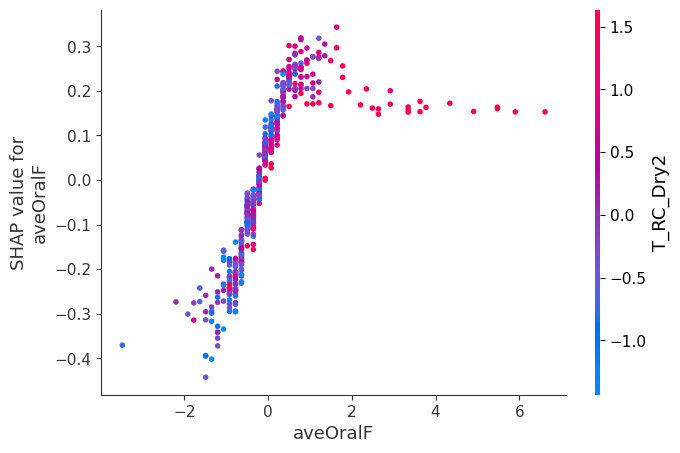

In [37]:
feature_name = "aveOralF"  # <-- Replace with a real one from your dataset
shap.dependence_plot(
    ind=feature_name,
    shap_values=shap_values,
    features=X_train,
    display_features=X_train
)



Available Features:
 ['T_offset1', 'Max1R13_1', 'Max1L13_1', 'aveAllR13_1', 'aveAllL13_1', 'T_RC1', 'T_RC_Dry1', 'T_RC_Wet1', 'T_RC_Max1', 'T_LC1', 'T_LC_Dry1', 'T_LC_Wet1', 'T_LC_Max1', 'RCC1', 'LCC1', 'canthiMax1', 'canthi4Max1', 'T_FHCC1', 'T_FHRC1', 'T_FHLC1', 'T_FHBC1', 'T_FHTC1', 'T_FH_Max1', 'T_FHC_Max1', 'T_Max1', 'T_OR1', 'T_OR_Max1', 'T_offset2', 'Max1R13_2', 'Max1L13_2', 'aveAllR13_2', 'aveAllL13_2', 'T_RC2', 'T_RC_Dry2', 'T_RC_Wet2', 'T_RC_Max2', 'T_LC2', 'T_LC_Dry2', 'T_LC_Wet2', 'T_LC_Max2', 'RCC2', 'LCC2', 'canthiMax2', 'canthi4Max2', 'T_FHCC2', 'T_FHRC2', 'T_FHLC2', 'T_FHBC2', 'T_FHTC2', 'T_FH_Max2', 'T_FHC_Max2', 'T_Max2', 'T_OR2', 'T_OR_Max2', 'T_offset3', 'Max1R13_3', 'Max1L13_3', 'aveAllR13_3', 'aveAllL13_3', 'T_RC3', 'T_RC_Dry3', 'T_RC_Wet3', 'T_RC_Max3', 'T_LC3', 'T_LC_Dry3', 'T_LC_Wet3', 'T_LC_Max3', 'RCC3', 'LCC3', 'canthiMax3', 'canthi4Max3', 'T_FHCC3', 'T_FHRC3', 'T_FHLC3', 'T_FHBC3', 'T_FHTC3', 'T_FH_Max3', 'T_FHC_Max3', 'T_Max3', 'T_OR3', 'T_OR_Max3', 'T_of

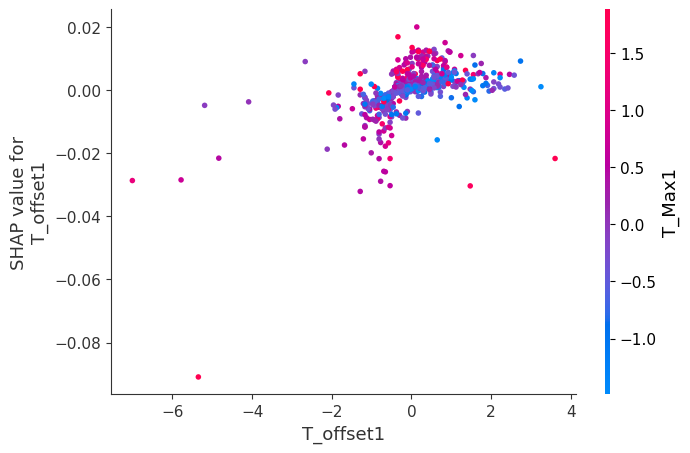

In [39]:
import pandas as pd
import xgboost as xgb
import shap
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Step 1: Load the dataset (assuming column names are in 3rd row)
df = pd.read_csv("ICI_groups1and2.csv", header=2)

# Step 2: Clean dataset
df = df.dropna(axis=1, how='all')  # Drop empty columns
df = df.loc[:, ~df.columns.duplicated()]  # Drop duplicate columns
df = df.drop(columns=[col for col in ['SubjectID', 'Time', 'Date'] if col in df.columns], errors='ignore')

# Step 3: Encode categorical columns
for col in df.select_dtypes(include=['object']).columns:
    df[col] = LabelEncoder().fit_transform(df[col].astype(str))

# Step 4: Drop rows with many missing values and fill the rest
df = df.dropna(thresh=int(0.8 * len(df.columns)))
df.fillna(df.median(numeric_only=True), inplace=True)

# Step 5: Set up features and target
target = 'aveOralM'  # Replace with your actual target column name
X = df.drop(columns=[target])
y = df[target]

# Step 6: Scale features
X_scaled = pd.DataFrame(StandardScaler().fit_transform(X), columns=X.columns)

# Step 7: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Step 8: Train XGBoost Regressor
model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Step 9: Compute SHAP values
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_train)

# Step 10: Check available features
print("\nAvailable Features:\n", X_train.columns.tolist())

# Step 11: Choose a feature for PDP
feature_name = X_train.columns[0]  # Replace with any valid feature name

# Step 12: Generate SHAP PDP (Partial Dependence Plot)
shap.dependence_plot(
    ind=feature_name,
    shap_values=shap_values,
    features=X_train,
    display_features=X_train
)


In [41]:
import numpy as np
import pandas as pd

# Replace inf/-inf with NaN
X_train = X_train.replace([np.inf, -np.inf], np.nan)
X_test = X_test.replace([np.inf, -np.inf], np.nan)

# Drop columns that are completely NaN (if any)
X_train = X_train.dropna(axis=1, how='all')
X_test = X_test[X_train.columns]  # Keep same columns as train

# Fill remaining NaNs with column means
X_train = X_train.fillna(X_train.mean())
X_test = X_test.fillna(X_train.mean())  # Use train means for consistency

# Identify and drop constant columns (zero variance)
constant_columns = X_train.loc[:, X_train.std() == 0].columns
X_train = X_train.drop(columns=constant_columns)
X_test = X_test.drop(columns=constant_columns)

# Now scale
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [43]:
print("Columns with NaNs after cleanup:", X_train.columns[X_train.isna().any()])
print("Columns with zero variance:", X_train.columns[X_train.std() == 0])

Columns with NaNs after cleanup: Index([], dtype='object')
Columns with zero variance: Index([], dtype='object')


R² Score: 0.764
RMSE: 0.230


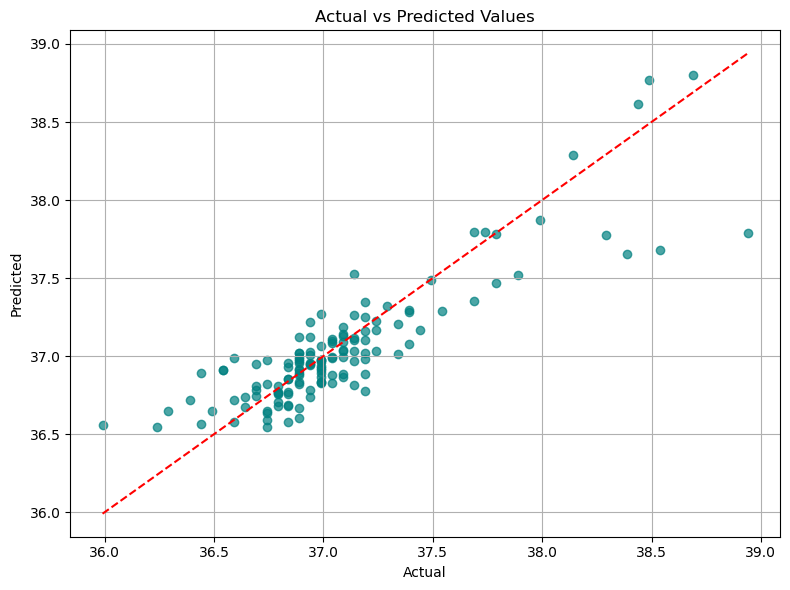

In [47]:
import pandas as pd
import shap
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import r2_score, mean_squared_error

# Load the dataset (assuming correct header row)
df = pd.read_csv("ICI_groups1and2.csv", header=2)

# Clean data
df = df.dropna(axis=1, how='all')
df = df.loc[:, ~df.columns.duplicated()]
df = df.drop(columns=[col for col in ['SubjectID', 'Time', 'Date'] if col in df.columns], errors='ignore')

# Encode categorical variables
for col in df.select_dtypes(include=['object']).columns:
    df[col] = LabelEncoder().fit_transform(df[col].astype(str))

# Drop rows with excessive NaNs and fill others
df = df.dropna(thresh=int(0.8 * len(df.columns)))
df.fillna(df.median(numeric_only=True), inplace=True)

# Define features and target
target = 'aveOralM'  # Replace if different
X = df.drop(columns=[target])
y = df[target]

# Scale features
X_scaled = pd.DataFrame(StandardScaler().fit_transform(X), columns=X.columns)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate
# Evaluate
r2 = r2_score(y_test, y_pred)
import numpy as np
rmse = np.sqrt(mean_squared_error(y_test, y_pred))


print(f"R² Score: {r2:.3f}")
print(f"RMSE: {rmse:.3f}")

# -----------------------------
#  Plot: Actual vs Predicted
# -----------------------------
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='teal')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Values')
plt.grid(True)
plt.tight_layout()
plt.show()




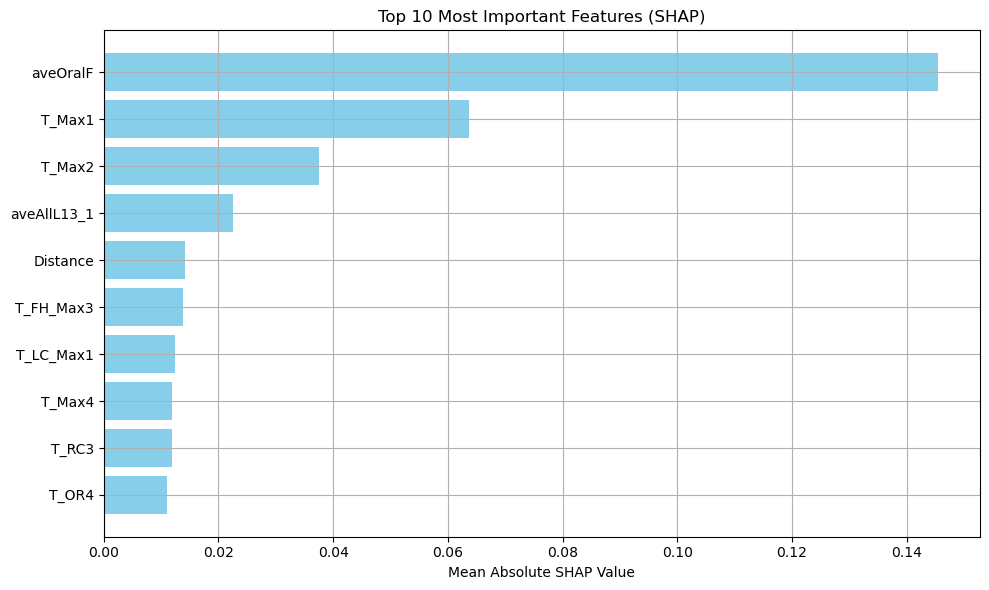

In [49]:
import numpy as np
import shap
import matplotlib.pyplot as plt

# Compute mean absolute SHAP value for each feature
shap_importance = np.abs(shap_values).mean(axis=0)
top_indices = np.argsort(shap_importance)[-10:][::-1]  # Top 10 indices

# Get corresponding feature names and values
top_features = X_train.columns[top_indices]
top_importance = shap_importance[top_indices]

# Plot bar chart
plt.figure(figsize=(10, 6))
plt.barh(top_features[::-1], top_importance[::-1], color='skyblue')
plt.xlabel("Mean Absolute SHAP Value")
plt.title("Top 10 Most Important Features (SHAP)")
plt.grid(True)
plt.tight_layout()
plt.show()


R² Score: -0.170
RMSE: 6.933


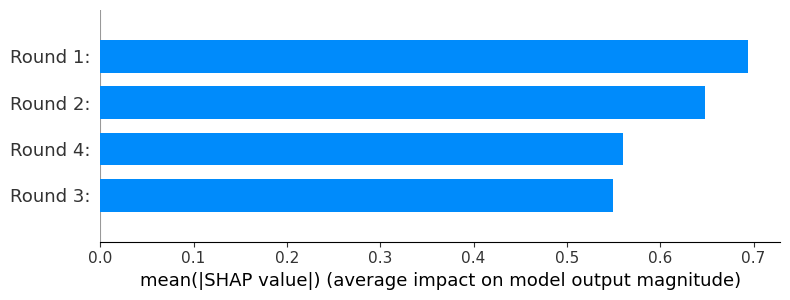

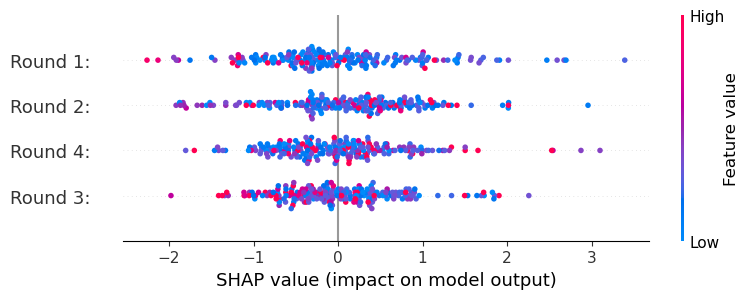

In [55]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
import shap
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("ICI_groups1and2.csv")

# Drop completely empty or unnamed columns
df = df.dropna(axis=1, how='all')
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

# Fill missing numeric values with median
df = df.fillna(df.median(numeric_only=True))

# Encode categorical variables if any
categorical_cols = df.select_dtypes(include='object').columns
for col in categorical_cols:
    df[col] = LabelEncoder().fit_transform(df[col].astype(str))

# Drop columns with only one unique value
df = df.loc[:, df.nunique() > 1]

# Split features and target
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# Scale the features
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predictions
y_pred = rf.predict(X_test)

# Evaluate model
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"R² Score: {r2:.3f}")
print(f"RMSE: {rmse:.3f}")

# --- SHAP Analysis ---
explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_test)

# Summary plot
shap.summary_plot(shap_values, X_test, plot_type="bar")
shap.summary_plot(shap_values, X_test)

# Optional: SHAP force plot for first instance
# shap.initjs()
# shap.force_plot(explainer.expected_value, shap_values[0], X_test.iloc[0])

In [57]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X.columns)


In [61]:
type(shap_values), len(shap_values), np.shape(shap_values[1])

(numpy.ndarray, 203, (4,))

In [63]:
(shap._explanation.Explanation, 135, (114, 2))

(shap._explanation.Explanation, 135, (114, 2))

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Columns: 125 entries, SubjectID to Date
dtypes: float64(119), object(6)
memory usage: 985.5+ KB
None

Missing values:
SubjectID       0
unnamed_1    1009
T_offset1      54
Max1R13_1      53
Max1L13_1      53
             ... 
Humidity        0
Distance        2
Cosmetics      32
Time            0
Date            0
Length: 125, dtype: int64
Binning 0.001 GB of training data: 0.041 s
Fitting gradient boosted rounds:
Fit 1000 trees in 1.013 s, (11119 total leaves)
Time spent computing histograms: 0.221s
Time spent finding best splits:  0.276s
Time spent applying splits:      0.144s
Time spent predicting:           0.020s
Mean Squared Error: 0.0684
Root Mean Squared Error: 0.2615
R-squared Score: 0.5390


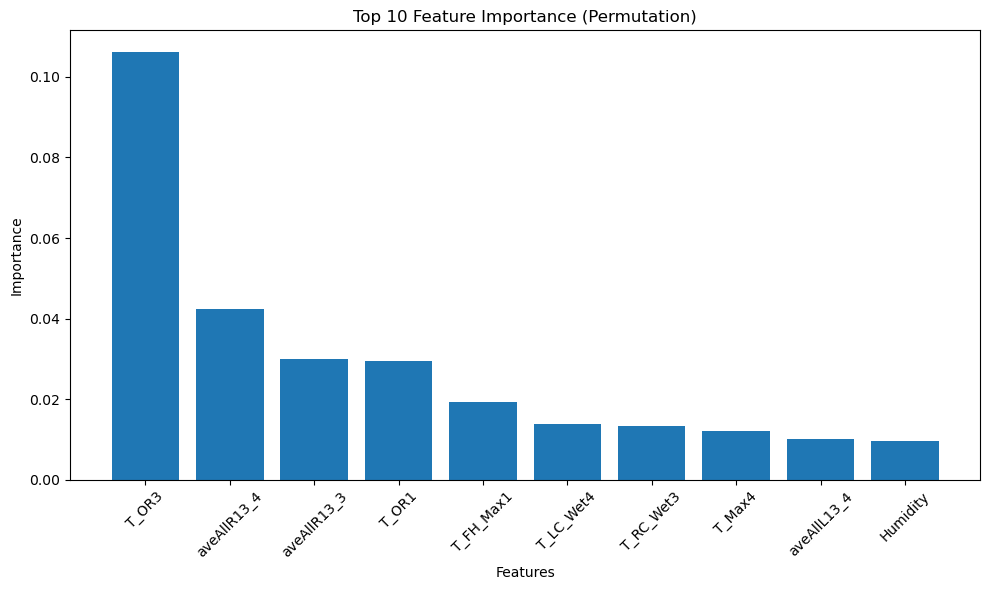


Top 10 Most Important Features:
         Feature  Importance
82         T_OR3    0.106205
88   aveAllR13_4    0.042399
60   aveAllR13_3    0.030046
26         T_OR1    0.029445
23     T_FH_Max1    0.019275
96     T_LC_Wet4    0.013913
64     T_RC_Wet3    0.013464
109       T_Max4    0.012117
89   aveAllL13_4    0.010070
117     Humidity    0.009584


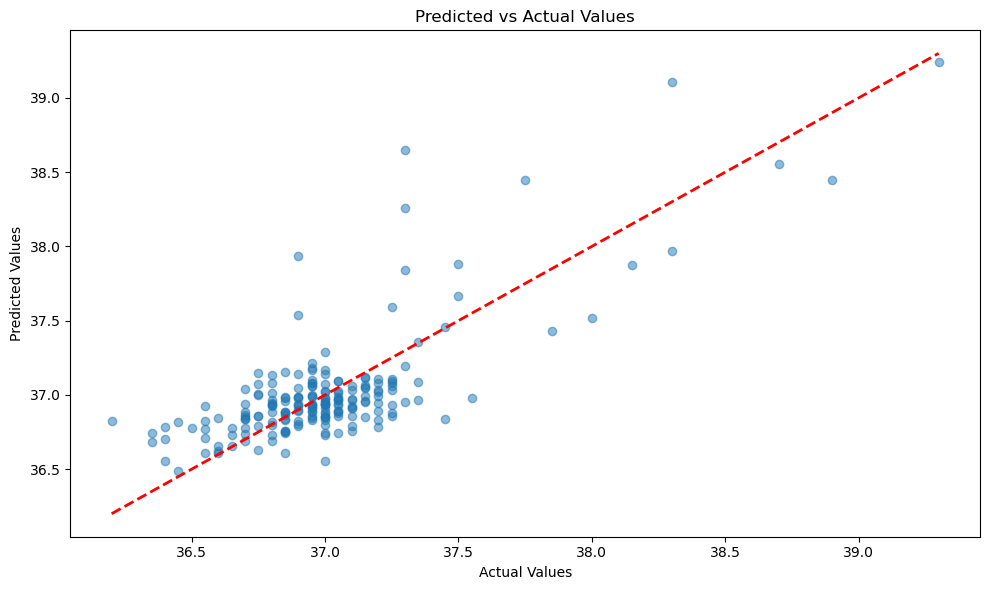

In [65]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.inspection import permutation_importance  # Added for feature importance
import matplotlib.pyplot as plt

# Load and fix the dataset
file_path = r"ICI_groups1and2.csv"
try:
    df = pd.read_csv(file_path)
except FileNotFoundError:
    print(f"Error: File not found at {file_path}")
    print("Please verify the file path and ensure the CSV file exists in that location")
    exit()

# Set column names from row 1 and handle duplicates
df.columns = df.iloc[1]
df = df.drop([0, 1]).reset_index(drop=True)

# Handle column names
columns = []
seen = {}
for col in df.columns:
    if pd.isna(col) or col == 'nan':
        col = f"unnamed_{len(seen)}"
    if col in seen:
        seen[col] += 1
        columns.append(f"{col}_{seen[col]}")
    else:
        seen[col] = 0
        columns.append(col)
df.columns = columns

# Convert numeric columns
categorical_cols = ['SubjectID', 'Gender', 'Ethnicity', 'Cosmetics', 'Time', 'Date']
numeric_columns = [col for col in df.columns if col not in categorical_cols]
df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Display basic information
print("Dataset Info:")
print(df.info())
print("\nMissing values:")
print(df.isnull().sum())

# Data Preprocessing
target = 'aveOralF'
features = [col for col in df.columns if col not in ['aveOralF', 'aveOralM', 'SubjectID', 'Time', 'Date']]

# Handle categorical variables
categorical_features = ['Gender', 'Ethnicity', 'Cosmetics']
for col in categorical_features:
    df[col] = df[col].astype('category')

# Handle missing values
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].mean())

# Split features and target
X = df[features]
y = df[target]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Initialize and train the HistGradientBoosting model
model = HistGradientBoostingRegressor(
    max_iter=1000,
    learning_rate=0.1,
    max_depth=6,
    random_state=42,
    categorical_features=[X.columns.get_loc(col) for col in categorical_features],
    verbose=1
)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.4f}")
print(f"Root Mean Squared Error: {rmse:.4f}")
print(f"R-squared Score: {r2:.4f}")

# Feature Importance using permutation importance
perm_importance = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=42)
feature_names = X_train.columns

feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': perm_importance.importances_mean
}).sort_values('Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.bar(feature_importance_df['Feature'][:10], feature_importance_df['Importance'][:10])
plt.xticks(rotation=45)
plt.title('Top 10 Feature Importance (Permutation)')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.tight_layout()
plt.show()

print("\nTop 10 Most Important Features:")
print(feature_importance_df.head(10))

# Plot predicted vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs Actual Values')
plt.tight_layout()
plt.show()

In [7]:
X_train_numeric = X_train.apply(pd.to_numeric, errors='coerce')
X_test_numeric = X_test.apply(pd.to_numeric, errors='coerce')


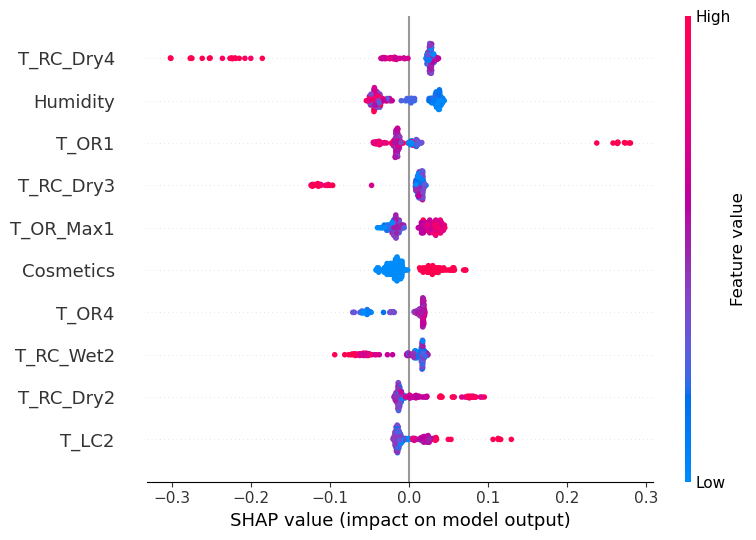

In [9]:
import shap

# SHAP expects numeric data only
explainer = shap.Explainer(model, X_train_numeric)

# Calculate SHAP values for test data
shap_values = explainer(X_test_numeric)

# Plot the SHAP summary
shap.summary_plot(shap_values, X_test_numeric, max_display=10)


In [11]:
df[col] = df[col].astype('category')


In [13]:
# One-hot encode categorical features
df = pd.get_dummies(df, columns=categorical_features, drop_first=True)


In [15]:
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("ICI_groups1and2.csv")
df.columns = df.iloc[1]
df = df.drop([0, 1]).reset_index(drop=True)

# Fix column names
columns = []
seen = {}
for col in df.columns:
    if pd.isna(col) or col == 'nan':
        col = f"unnamed_{len(seen)}"
    if col in seen:
        seen[col] += 1
        columns.append(f"{col}_{seen[col]}")
    else:
        seen[col] = 0
        columns.append(col)
df.columns = columns

# Convert to numeric
categorical_cols = ['SubjectID', 'Gender', 'Ethnicity', 'Cosmetics', 'Time', 'Date']
numeric_cols = [col for col in df.columns if col not in categorical_cols]
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')

# Handle categorical columns (optional: one-hot encode for classifier)
df = pd.get_dummies(df, columns=['Gender', 'Ethnicity', 'Cosmetics'], drop_first=True)

# Create binary classification target: 1 if aveOralF above median, else 0
df['target_class'] = (df['aveOralF'] > df['aveOralF'].median()).astype(int)

# Drop unused columns
df = df.drop(columns=['aveOralF', 'aveOralM', 'SubjectID', 'Time', 'Date'])

# Handle missing values
df = df.fillna(df.mean(numeric_only=True))

# Split into features and target
X = df.drop(columns=['target_class'])
y = df['target_class']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train classifier
model = HistGradientBoostingClassifier(max_iter=500, max_depth=6, learning_rate=0.1, random_state=42)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.6633663366336634

Classification Report:
              precision    recall  f1-score   support

           0       0.57      0.72      0.63        82
           1       0.77      0.62      0.69       120

    accuracy                           0.66       202
   macro avg       0.67      0.67      0.66       202
weighted avg       0.68      0.66      0.67       202


Confusion Matrix:
[[59 23]
 [45 75]]


In [19]:
# Ensure X_train is fully numeric
X_train = X_train.apply(pd.to_numeric, errors='coerce')
X_test = X_test.apply(pd.to_numeric, errors='coerce')

# Optional: drop any remaining non-numeric just to be safe
X_train = X_train.select_dtypes(include=[np.number])
X_test = X_test[X_train.columns]  # ensure same columns


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Columns: 125 entries, SubjectID to Date
dtypes: float64(119), object(6)
memory usage: 985.5+ KB
None

Missing values:
SubjectID       0
unnamed_1    1009
T_offset1      54
Max1R13_1      53
Max1L13_1      53
             ... 
Humidity        0
Distance        2
Cosmetics      32
Time            0
Date            0
Length: 125, dtype: int64
Binning 0.001 GB of training data: 0.039 s
Fitting gradient boosted rounds:
Fit 1000 trees in 1.059 s, (11119 total leaves)
Time spent computing histograms: 0.219s
Time spent finding best splits:  0.273s
Time spent applying splits:      0.137s
Time spent predicting:           0.013s
Mean Squared Error: 0.0684
Root Mean Squared Error: 0.2615
R-squared Score: 0.5390


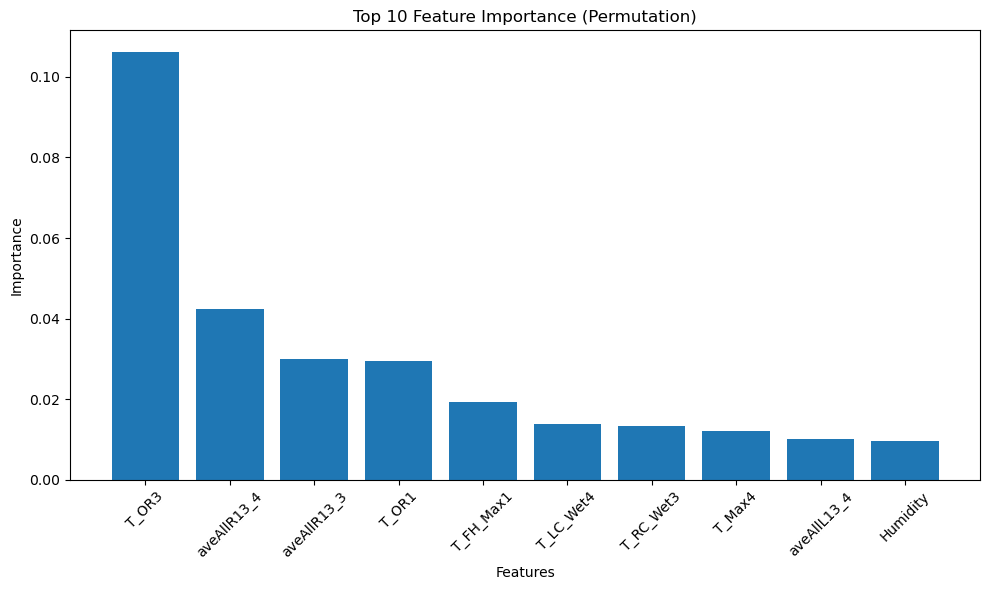


Top 10 Most Important Features:
         Feature  Importance
82         T_OR3    0.106205
88   aveAllR13_4    0.042399
60   aveAllR13_3    0.030046
26         T_OR1    0.029445
23     T_FH_Max1    0.019275
96     T_LC_Wet4    0.013913
64     T_RC_Wet3    0.013464
109       T_Max4    0.012117
89   aveAllL13_4    0.010070
117     Humidity    0.009584


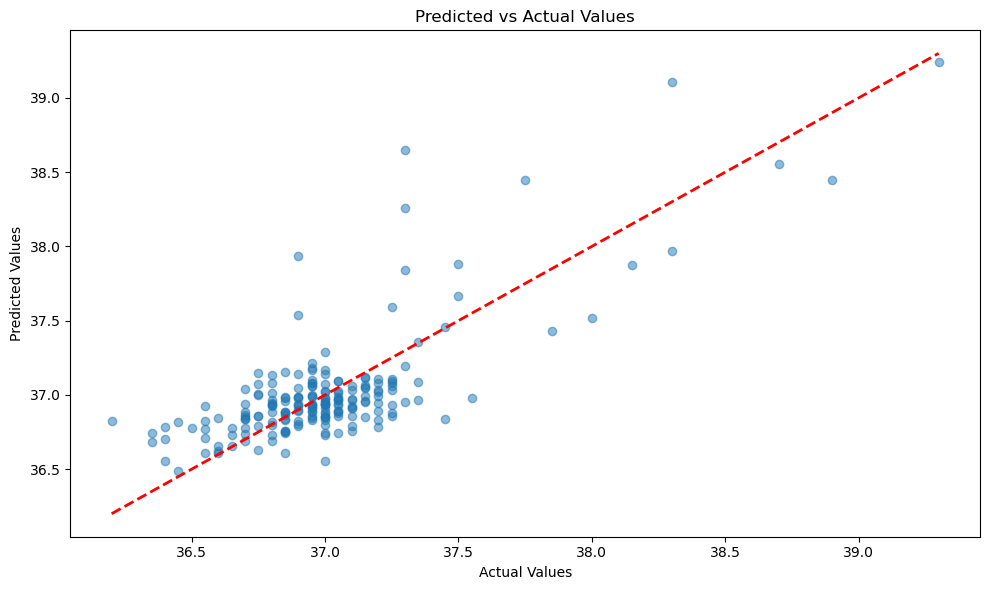

In [19]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.inspection import permutation_importance  # Added for feature importance
import matplotlib.pyplot as plt

# Load and fix the dataset
file_path = r"ICI_groups1and2.csv"
try:
    df = pd.read_csv(file_path)
except FileNotFoundError:
    print(f"Error: File not found at {file_path}")
    print("Please verify the file path and ensure the CSV file exists in that location")
    exit()

# Set column names from row 1 and handle duplicates
df.columns = df.iloc[1]
df = df.drop([0, 1]).reset_index(drop=True)

# Handle column names
columns = []
seen = {}
for col in df.columns:
    if pd.isna(col) or col == 'nan':
        col = f"unnamed_{len(seen)}"
    if col in seen:
        seen[col] += 1
        columns.append(f"{col}_{seen[col]}")
    else:
        seen[col] = 0
        columns.append(col)
df.columns = columns

# Convert numeric columns
categorical_cols = ['SubjectID', 'Gender', 'Ethnicity', 'Cosmetics', 'Time', 'Date']
numeric_columns = [col for col in df.columns if col not in categorical_cols]
df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Display basic information
print("Dataset Info:")
print(df.info())
print("\nMissing values:")
print(df.isnull().sum())

# Data Preprocessing
target = 'aveOralF'
features = [col for col in df.columns if col not in ['aveOralF', 'aveOralM', 'SubjectID', 'Time', 'Date']]

# Handle categorical variables
categorical_features = ['Gender', 'Ethnicity', 'Cosmetics']
for col in categorical_features:
    df[col] = df[col].astype('category')

# Handle missing values
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].mean())

# Split features and target
X = df[features]
y = df[target]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Initialize and train the HistGradientBoosting model
model = HistGradientBoostingRegressor(
    max_iter=1000,
    learning_rate=0.1,
    max_depth=6,
    random_state=42,
    categorical_features=[X.columns.get_loc(col) for col in categorical_features],
    verbose=1
)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.4f}")
print(f"Root Mean Squared Error: {rmse:.4f}")
print(f"R-squared Score: {r2:.4f}")

# Feature Importance using permutation importance
perm_importance = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=42)
feature_names = X_train.columns

feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': perm_importance.importances_mean
}).sort_values('Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.bar(feature_importance_df['Feature'][:10], feature_importance_df['Importance'][:10])
plt.xticks(rotation=45)
plt.title('Top 10 Feature Importance (Permutation)')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.tight_layout()
plt.show()

print("\nTop 10 Most Important Features:")
print(feature_importance_df.head(10))

# Plot predicted vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs Actual Values')
plt.tight_layout()
plt.show()

In [23]:
# Encode categorical columns for SHAP (SHAP needs numeric data)
X_train_shap = X_train.copy()
X_test_shap = X_test.copy()

for col in categorical_features:
    X_train_shap[col] = X_train_shap[col].cat.codes
    X_test_shap[col] = X_test_shap[col].cat.codes


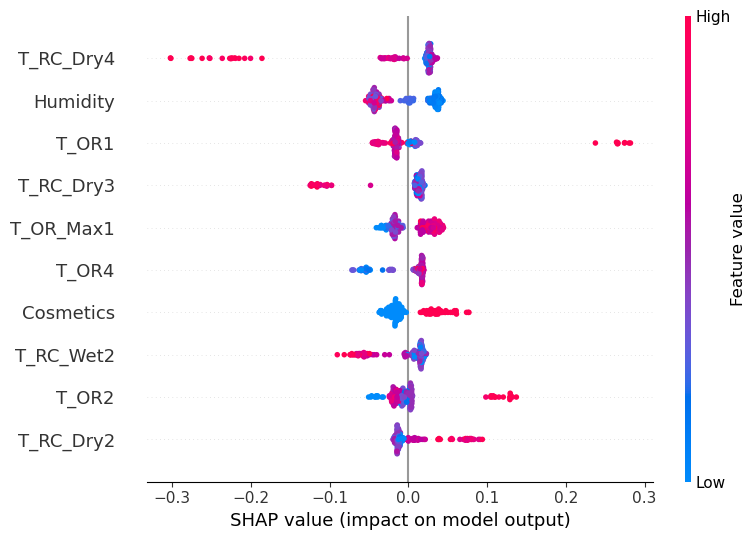

In [25]:
# Create SHAP explainer and calculate values
explainer = shap.Explainer(model, X_train_shap)
shap_values = explainer(X_test_shap, check_additivity=False)

# SHAP summary plot
shap.summary_plot(shap_values, X_test_shap, max_display=10)


In [27]:
print(X_train.dtypes)


unnamed_1       float64
T_offset1       float64
Max1R13_1       float64
Max1L13_1       float64
aveAllR13_1     float64
                 ...   
Ethnicity      category
T_atm           float64
Humidity        float64
Distance        float64
Cosmetics      category
Length: 120, dtype: object


Binning 0.001 GB of training data: 

C:\Users\yashw\AppData\Local\Temp\ipykernel_86320\704884747.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['target_class'] = (df['aveOralF'].astype(float) > threshold).astype(int)


0.037 s
Fitting gradient boosted rounds:
Fit 1000 trees in 1.012 s, (11736 total leaves)
Time spent computing histograms: 0.249s
Time spent finding best splits:  0.252s
Time spent applying splits:      0.136s
Time spent predicting:           0.019s

Accuracy: 0.6485

Classification Report:
              precision    recall  f1-score   support

           0       0.55      0.72      0.62        82
           1       0.76      0.60      0.67       120

    accuracy                           0.65       202
   macro avg       0.65      0.66      0.65       202
weighted avg       0.67      0.65      0.65       202



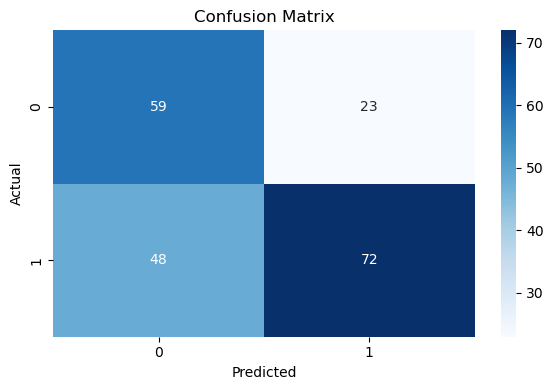

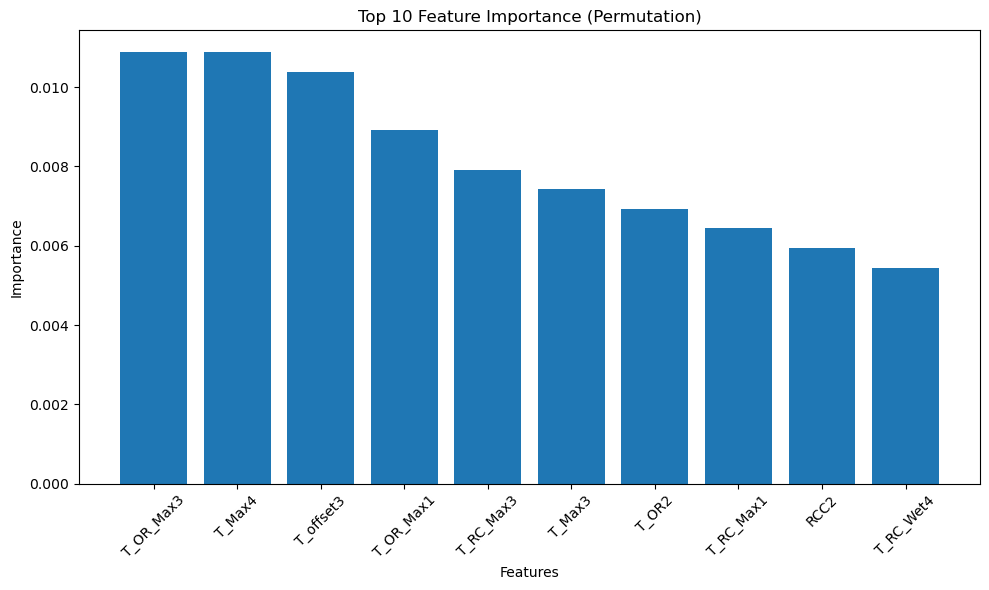

In [33]:
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns

# Create a binary classification target (e.g., high vs low aveOralF)
threshold = df['aveOralF'].median()
df['target_class'] = (df['aveOralF'].astype(float) > threshold).astype(int)

# Redefine features and target
features = [col for col in df.columns if col not in ['aveOralF', 'aveOralM', 'SubjectID', 'Time', 'Date', 'target_class']]
X = df[features]
y = df['target_class']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Initialize classifier
clf = HistGradientBoostingClassifier(
    max_iter=1000,
    learning_rate=0.1,
    max_depth=6,
    random_state=42,
    categorical_features=[X.columns.get_loc(col) for col in categorical_features],
    verbose=1
)

# Train classifier
clf.fit(X_train, y_train)

# Predict
y_pred = clf.predict(X_test)

# Evaluate
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()

# Permutation importance (for classification)
perm_importance = permutation_importance(clf, X_test, y_test, n_repeats=10, random_state=42)
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': perm_importance.importances_mean
}).sort_values('Importance', ascending=False)

# Plot top 10 features
plt.figure(figsize=(10, 6))
plt.bar(feature_importance_df['Feature'][:10], feature_importance_df['Importance'][:10])
plt.xticks(rotation=45)
plt.title('Top 10 Feature Importance (Permutation)')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.tight_layout()
plt.show()


Binning 0.001 GB of training data: 0.039 s
Fitting gradient boosted rounds:
Fit 1000 trees in 1.041 s, (11724 total leaves)
Time spent computing histograms: 0.242s
Time spent finding best splits:  0.273s
Time spent applying splits:      0.145s
Time spent predicting:           0.023s
Accuracy: 0.6633663366336634

Classification Report:
               precision    recall  f1-score   support

           0       0.57      0.72      0.63        82
           1       0.77      0.62      0.69       120

    accuracy                           0.66       202
   macro avg       0.67      0.67      0.66       202
weighted avg       0.68      0.66      0.67       202


Confusion Matrix:
 [[59 23]
 [45 75]]


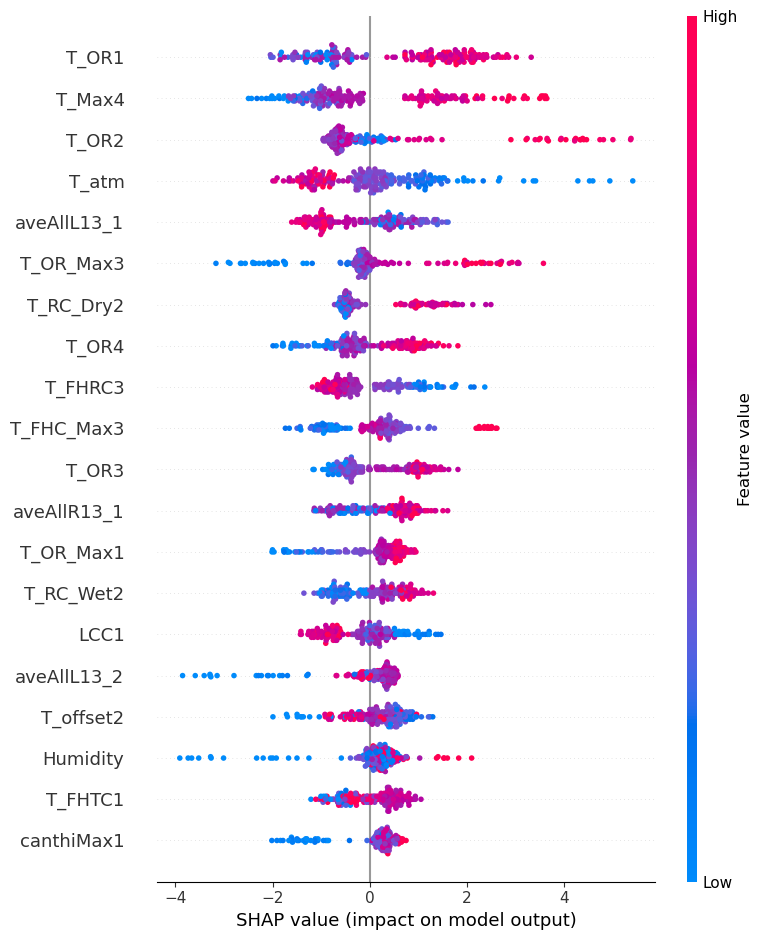

In [45]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import shap

# Load dataset
file_path = r"ICI_groups1and2.csv"
try:
    df = pd.read_csv(file_path)
except FileNotFoundError:
    print(f"Error: File not found at {file_path}")
    exit()

# Set proper column names and remove header rows
df.columns = df.iloc[1]
df = df.drop([0, 1]).reset_index(drop=True)

# Handle duplicate/NaN column names
columns = []
seen = {}
for col in df.columns:
    if pd.isna(col) or col == 'nan':
        col = f"unnamed_{len(seen)}"
    if col in seen:
        seen[col] += 1
        columns.append(f"{col}_{seen[col]}")
    else:
        seen[col] = 0
        columns.append(col)
df.columns = columns

# Define categorical and numeric columns
categorical_cols = ['SubjectID', 'Gender', 'Ethnicity', 'Cosmetics', 'Time', 'Date']
numeric_columns = [col for col in df.columns if col not in categorical_cols]

# Convert numeric values
df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Handle categorical variables
for col in ['Gender', 'Ethnicity', 'Cosmetics']:
    df[col] = df[col].astype('category')

# Fill missing numeric values
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].mean())

# Define classification target
df['aveOralF'] = pd.to_numeric(df['aveOralF'], errors='coerce')
median_val = df['aveOralF'].median()

# Avoid fragmentation warning by copying
df = df.copy()
df['aveOralF_bin'] = (df['aveOralF'] > median_val).astype(int)

# Define features and target
target = 'aveOralF_bin'
features = [col for col in df.columns if col not in ['aveOralF', 'aveOralM', 'SubjectID', 'Time', 'Date', 'aveOralF_bin']]

X = df[features]
y = df[target]

# Encode categorical variables
X_encoded = pd.get_dummies(X, drop_first=True)

# Ensure SHAP compatibility by enforcing float32 dtype
X_encoded = X_encoded.apply(pd.to_numeric, errors='coerce').fillna(0).astype(np.float32)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42
)

# Train classifier
clf = HistGradientBoostingClassifier(
    max_iter=1000,
    learning_rate=0.1,
    max_depth=6,
    random_state=42,
    verbose=1
)
clf.fit(X_train, y_train)

# Predictions and Evaluation
y_pred = clf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

# SHAP explainability
explainer = shap.Explainer(clf, X_train, feature_names=X_train.columns.tolist())
shap_values = explainer(X_test, check_additivity=False)

# SHAP summary plot
shap.summary_plot(shap_values, X_test, show=True)
